In [1]:
using MLJ
import RDatasets:dataset

┌ Info: Precompiling MLJ [add582a8-e3ab-11e8-2d5e-e98b27df1bc7]
└ @ Base loading.jl:1260
[ Info: Model metadata loaded from registry. 


In [2]:
using DataFrames

In [12]:
import StatsBase:countmap,cor,var

In [4]:
using PrettyPrinting

┌ Info: Precompiling PrettyPrinting [54e16d92-306c-5ea0-a30b-337be88ac337]
└ @ Base loading.jl:1260


In [5]:
smarket = dataset("ISLR","Smarket")

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Cat…
1,2001.0,0.381,-0.192,-2.624,-1.055,5.01,1.1913,0.959,Up
2,2001.0,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001.0,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001.0,-0.623,1.032,0.959,0.381,-0.192,1.276,0.614,Up
5,2001.0,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
6,2001.0,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up
7,2001.0,1.392,0.213,0.614,-0.623,1.032,1.445,-0.403,Down
8,2001.0,-0.403,1.392,0.213,0.614,-0.623,1.4078,0.027,Up
9,2001.0,0.027,-0.403,1.392,0.213,0.614,1.164,1.303,Up


In [6]:
@show size(smarket)
@show names(smarket)

size(smarket) = (1250, 9)
names(smarket) = ["Year", "Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume", "Today", "Direction"]


9-element Array{String,1}:
 "Year"
 "Lag1"
 "Lag2"
 "Lag3"
 "Lag4"
 "Lag5"
 "Volume"
 "Today"
 "Direction"

In [8]:
showall(describe(smarket))

┌ Warning: `showall(df::AbstractDataFrame, allcols::Bool = true)` is deprecated, use `show(df, allrows = true, allcols = allcols)` instead.
│   caller = showall(::DataFrame) at deprecated.jl:66
└ @ DataFrames .\deprecated.jl:66


9×8 DataFrame
│ Row │ variable  │ mean      │ min     │ median  │ max     │ nunique │
│     │ Symbol    │ Union…    │ Any     │ Union…  │ Any     │ Union…  │
├─────┼───────────┼───────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ Year      │ 2003.02   │ 2001.0  │ 2003.0  │ 2005.0  │         │
│ 2   │ Lag1      │ 0.0038344 │ -4.922  │ 0.039   │ 5.733   │         │
│ 3   │ Lag2      │ 0.0039192 │ -4.922  │ 0.039   │ 5.733   │         │
│ 4   │ Lag3      │ 0.001716  │ -4.922  │ 0.0385  │ 5.733   │         │
│ 5   │ Lag4      │ 0.001636  │ -4.922  │ 0.0385  │ 5.733   │         │
│ 6   │ Lag5      │ 0.0056096 │ -4.922  │ 0.0385  │ 5.733   │         │
│ 7   │ Volume    │ 1.4783    │ 0.35607 │ 1.42295 │ 3.15247 │         │
│ 8   │ Today     │ 0.0031384 │ -4.922  │ 0.0385  │ 5.733   │         │
│ 9   │ Direction │           │ Down    │         │ Up      │ 2       │

│ Row │ nmissing │ eltype                         │
│     │ Nothing  │ DataType                       │
├─────┼──────────

In [9]:
y = smarket.Direction

1250-element CategoricalArray{String,1,UInt8}:
 "Up"
 "Up"
 "Down"
 "Up"
 "Up"
 "Up"
 "Down"
 "Up"
 "Up"
 "Up"
 "Down"
 "Down"
 "Up"
 ⋮
 "Up"
 "Down"
 "Down"
 "Down"
 "Down"
 "Up"
 "Up"
 "Up"
 "Down"
 "Up"
 "Down"
 "Down"

In [10]:
X= select(smarket,Not(:Direction))

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2001.0,0.381,-0.192,-2.624,-1.055,5.01,1.1913,0.959
2,2001.0,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032
3,2001.0,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623
4,2001.0,-0.623,1.032,0.959,0.381,-0.192,1.276,0.614
5,2001.0,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213
6,2001.0,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392
7,2001.0,1.392,0.213,0.614,-0.623,1.032,1.445,-0.403
8,2001.0,-0.403,1.392,0.213,0.614,-0.623,1.4078,0.027
9,2001.0,0.027,-0.403,1.392,0.213,0.614,1.164,1.303


In [13]:
cm= X |> Matrix |> cor

8×8 Array{Float64,2}:
 1.0         0.0296996    0.0305964    0.0331946   …   0.539006    0.0300952
 0.0296996   1.0         -0.0262943   -0.0108034       0.0409099  -0.026155
 0.0305964  -0.0262943    1.0         -0.0258967      -0.0433832  -0.01025
 0.0331946  -0.0108034   -0.0258967    1.0            -0.0418237  -0.00244765
 0.0356887  -0.00298591  -0.0108535   -0.024051       -0.0484142  -0.00689953
 0.029788   -0.00567461  -0.00355795  -0.0188083   …  -0.0220023  -0.0348601
 0.539006    0.0409099   -0.0433832   -0.0418237       1.0         0.0145918
 0.0300952  -0.026155    -0.01025     -0.00244765      0.0145918   1.0

In [14]:
round.(cm, sigdigits=1)

8×8 Array{Float64,2}:
 1.0    0.03    0.03    0.03    0.04    0.03    0.5    0.03
 0.03   1.0    -0.03   -0.01   -0.003  -0.006   0.04  -0.03
 0.03  -0.03    1.0    -0.03   -0.01   -0.004  -0.04  -0.01
 0.03  -0.01   -0.03    1.0    -0.02   -0.02   -0.04  -0.002
 0.04  -0.003  -0.01   -0.02    1.0    -0.03   -0.05  -0.007
 0.03  -0.006  -0.004  -0.02   -0.03    1.0    -0.02  -0.03
 0.5    0.04   -0.04   -0.04   -0.05   -0.02    1.0    0.01
 0.03  -0.03   -0.01   -0.002  -0.007  -0.03    0.01   1.0

In [15]:
using PyPlot

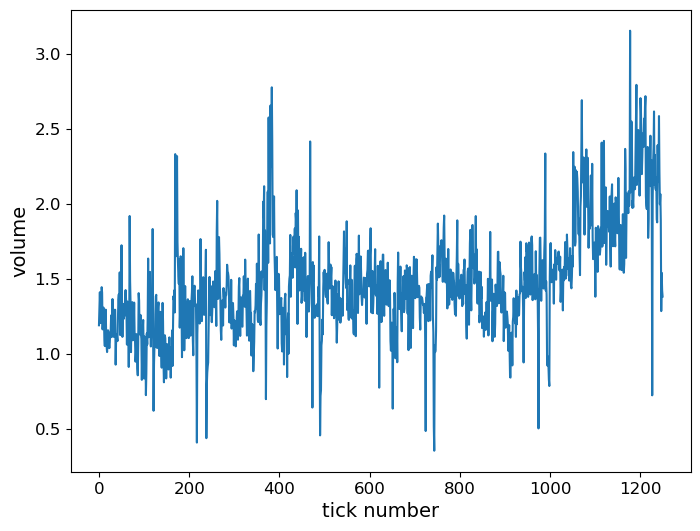

([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5], PyCall.PyObject[PyObject Text(0, 0.0, '0.0'), PyObject Text(0, 0.5, '0.5'), PyObject Text(0, 1.0, '1.0'), PyObject Text(0, 1.5, '1.5'), PyObject Text(0, 2.0, '2.0'), PyObject Text(0, 2.5, '2.5'), PyObject Text(0, 3.0, '3.0'), PyObject Text(0, 3.5, '3.5')])

In [17]:
figure(figsize=(8,6))
plot(X.Volume)
xlabel("tick number",fontsize=14)
ylabel("volume",fontsize=14)
xticks(fontsize=12)
yticks(fontsize=12)

In [19]:
y= coerce(y,OrderedFactor)
classes(y[1])

2-element CategoricalArray{String,1,UInt8}:
 "Down"
 "Up"

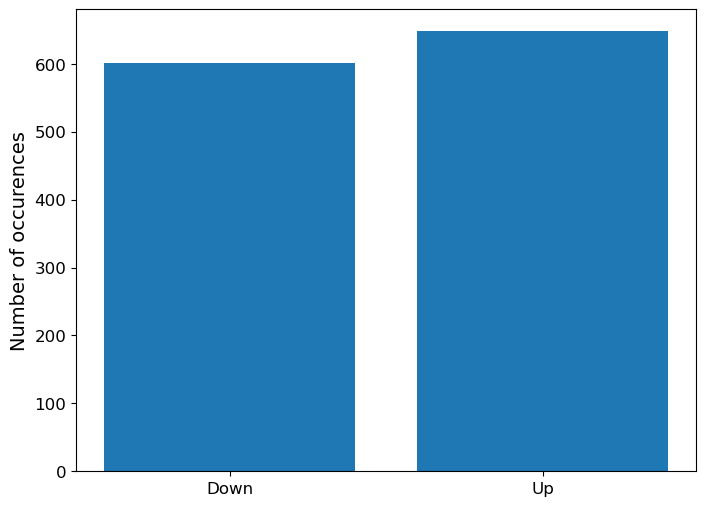

PyObject Text(29.000000000000014, 0.5, 'Number of occurences')

In [20]:
figure(figsize=(8,6))
cm = countmap(y)
bar([1, 2], [cm["Down"], cm["Up"]])
xticks([1, 2], ["Down", "Up"], fontsize=12)
yticks(fontsize=12)
ylabel("Number of occurences", fontsize=14)

In [22]:
@load LogisticClassifier pkg= MLJLinearModels

┌ Info: Precompiling MLJLinearModels [6ee0df7b-362f-4a72-a706-9e79364fb692]
└ @ Base loading.jl:1260


LogisticClassifier(
    lambda = 1.0,
    gamma = 0.0,
    penalty = :l2,
    fit_intercept = true,
    penalize_intercept = false,
    solver = nothing) @018

In [24]:
X2=  select(X,Not([:Year,:Today]))

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.381,-0.192,-2.624,-1.055,5.01,1.1913
2,0.959,0.381,-0.192,-2.624,-1.055,1.2965
3,1.032,0.959,0.381,-0.192,-2.624,1.4112
4,-0.623,1.032,0.959,0.381,-0.192,1.276
5,0.614,-0.623,1.032,0.959,0.381,1.2057
6,0.213,0.614,-0.623,1.032,0.959,1.3491
7,1.392,0.213,0.614,-0.623,1.032,1.445
8,-0.403,1.392,0.213,0.614,-0.623,1.4078
9,0.027,-0.403,1.392,0.213,0.614,1.164


In [25]:
clf = machine(LogisticClassifier(),X2,y)

Machine{LogisticClassifier} @859 trained 0 times.
  args: 
    1:	Source @757 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @214 ⏎ `AbstractArray{OrderedFactor{2},1}`


In [26]:
fit!(clf)

┌ Info: Training Machine{LogisticClassifier} @859.
└ @ MLJBase C:\Users\Rahul\.julia\packages\MLJBase\uKzAz\src\machines.jl:319


Machine{LogisticClassifier} @859 trained 1 time.
  args: 
    1:	Source @757 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @214 ⏎ `AbstractArray{OrderedFactor{2},1}`


In [27]:
yhat = MLJ.predict(clf,X2)

1250-element MLJBase.UnivariateFiniteArray{OrderedFactor{2},String,UInt8,Float64,1}:
 UnivariateFinite{OrderedFactor{2}}(Down=>0.493, Up=>0.507)
 UnivariateFinite{OrderedFactor{2}}(Down=>0.518, Up=>0.482)
 UnivariateFinite{OrderedFactor{2}}(Down=>0.519, Up=>0.481)
 UnivariateFinite{OrderedFactor{2}}(Down=>0.485, Up=>0.515)
 UnivariateFinite{OrderedFactor{2}}(Down=>0.489, Up=>0.511)
 UnivariateFinite{OrderedFactor{2}}(Down=>0.493, Up=>0.507)
 UnivariateFinite{OrderedFactor{2}}(Down=>0.507, Up=>0.493)
 UnivariateFinite{OrderedFactor{2}}(Down=>0.491, Up=>0.509)
 UnivariateFinite{OrderedFactor{2}}(Down=>0.482, Up=>0.518)
 UnivariateFinite{OrderedFactor{2}}(Down=>0.511, Up=>0.489)
 UnivariateFinite{OrderedFactor{2}}(Down=>0.503, Up=>0.497)
 UnivariateFinite{OrderedFactor{2}}(Down=>0.48, Up=>0.52)
 UnivariateFinite{OrderedFactor{2}}(Down=>0.481, Up=>0.519)
 ⋮
 UnivariateFinite{OrderedFactor{2}}(Down=>0.463, Up=>0.537)
 UnivariateFinite{OrderedFactor{2}}(Down=>0.472, Up=>0.528)
 UnivariateFin

In [28]:
yhat[1:3]

3-element MLJBase.UnivariateFiniteArray{OrderedFactor{2},String,UInt8,Float64,1}:
 UnivariateFinite{OrderedFactor{2}}(Down=>0.493, Up=>0.507)
 UnivariateFinite{OrderedFactor{2}}(Down=>0.518, Up=>0.482)
 UnivariateFinite{OrderedFactor{2}}(Down=>0.519, Up=>0.481)

In [33]:
r3 = x -> round(x, sigdigits=3)
r3(pi)

3.14

In [30]:
yhat = predict_mode(clf,X2)

1250-element CategoricalArray{String,1,UInt8}:
 "Up"
 "Down"
 "Down"
 "Up"
 "Up"
 "Up"
 "Down"
 "Up"
 "Up"
 "Down"
 "Down"
 "Up"
 "Up"
 ⋮
 "Up"
 "Up"
 "Up"
 "Up"
 "Up"
 "Up"
 "Up"
 "Up"
 "Up"
 "Up"
 "Up"
 "Up"

In [34]:
misclassification_rate(yhat,y) |> r3

0.479

In [37]:
cm = confusion_matrix(yhat,y)

              ┌───────────────────────────┐
              │       Ground Truth        │
┌─────────────┼─────────────┬─────────────┤
│  Predicted  │    Down     │     Up      │
├─────────────┼─────────────┼─────────────┤
│    Down     │     144     │     141     │
├─────────────┼─────────────┼─────────────┤
│     Up      │     458     │     507     │
└─────────────┴─────────────┴─────────────┘


In [39]:
@show false_positive(cm)
@show accuracy(yhat,y) |> r3
@show accuracy(cm)    |> r3  # same thing
@show precision(yhat, y) |> r3
@show recall(yhat, y)    |> r3
@show f1score(yhat, y)   |> r3

false_positive(cm) = 458
accuracy(yhat, y) |> r3 = 0.521
accuracy(cm) |> r3 = 0.521
precision(yhat, y) |> r3 = 0.525
recall(yhat, y) |> r3 = 0.782
f1score(yhat, y) |> r3 = 0.629


0.629

In [40]:
Xnew = (Lag1 = [1.2, 1.5], Lag2 = [1.1, -0.8])
ŷ = MLJ.predict(clf, Xnew)
ŷ |> pprint

UnivariateFinite{OrderedFactor{2},String,UInt8,Float64}[UnivariateFinite{OrderedFactor{2}}(Down=>0.563, Up=>0.437), UnivariateFinite{OrderedFactor{2}}(Down=>0.549, Up=>0.451)]

In [44]:
@load BayesianLDA pkg=MultivariateStats

┌ Info: Precompiling MultivariateStats [6f286f6a-111f-5878-ab1e-185364afe411]
└ @ Base loading.jl:1260


BayesianLDA(
    method = :gevd,
    cov_w = SimpleCovariance(false),
    cov_b = SimpleCovariance(false),
    out_dim = 0,
    regcoef = 1.0e-6,
    priors = nothing) @330

In [46]:
X3 = select(X2, [:Lag1, :Lag2])

,Lag1,Lag2
,Float64,Float64
1,0.381,-0.192
2,0.959,0.381
3,1.032,0.959
4,-0.623,1.032
5,0.614,-0.623
6,0.213,0.614
7,1.392,0.213
8,-0.403,1.392
9,0.027,-0.403


In [48]:
train = 1:findlast(X.Year .< 2005)
test = last(train)+1:length(y);

In [49]:
clf = machine(BayesianLDA(), X3, y)
fit!(clf, rows=train)
ŷ = predict_mode(clf, rows=test)

accuracy(ŷ, y[test]) |> r3

┌ Info: Training Machine{BayesianLDA} @770.
└ @ MLJBase C:\Users\Rahul\.julia\packages\MLJBase\uKzAz\src\machines.jl:319


0.56

In [50]:
@load KNNClassifier pkg=NearestNeighbors

knnc = KNNClassifier(K=1)
clf = machine(knnc, X3, y)
fit!(clf, rows=train)
ŷ = predict_mode(clf, rows=test)
accuracy(ŷ, y[test]) |> r3

┌ Info: Training Machine{KNNClassifier} @824.
└ @ MLJBase C:\Users\Rahul\.julia\packages\MLJBase\uKzAz\src\machines.jl:319


0.5

In [51]:
knnc.K = 3
fit!(clf, rows=train)
ŷ = predict_mode(clf, rows=test)
accuracy(ŷ, y[test]) |> r3

┌ Info: Updating Machine{KNNClassifier} @824.
└ @ MLJBase C:\Users\Rahul\.julia\packages\MLJBase\uKzAz\src\machines.jl:320


0.532